In [185]:
TRAIN_DATA = "DATA/train.csv"
TEST_DATA = "DATA/test.csv"
SUBMISSON_DATA = "DATA/submission.csv"

In [186]:
import pandas as pd
import statsmodels.api as sm

In [187]:
df = pd.read_csv(TRAIN_DATA)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [188]:
df.rename({df.columns[9]: "Решение"}, inplace=True)
df.columns

Index(['Содержание', 'Сервис', 'Приоритет', 'Статус', 'Функциональная группа',
       'Крайний срок', 'Дата обращения', 'Тип обращения на момент подачи',
       'Тип обращения итоговый', 'Решение             ',
       'Тип переклассификации', 'Дата восстановления',
       'Дата закрытия обращения', 'Критичность', 'Влияние', 'Система',
       'Место'],
      dtype='object')

In [189]:
tdf = df[df['Статус'] == 'Отменен']
tdf['Тип переклассификации'].value_counts()

Тип переклассификации
0    434
Name: count, dtype: int64

In [190]:
priority = {'3-Низкий': 0, '2-Средний': 1, '1-Высокий': 2, '0-Критический': 3}
status = {'Отменен': 0, 'Закрыт': 1}
obr = {'Запрос': 0, 'Инцидент': 1}
critical = {'4-Нет': 0, "3-Базовая": 2, "2-Повышенная": 3, "1-Особая": 1}
influence = {"4-Нет влияния": 0, "3-Малое": 1, "2-Значительное": 2, "1-Всеохватывающее": 3}

In [191]:
df['Приоритет'] = df['Приоритет'].map(priority)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,0,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,0,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,0,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,0,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,1,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,0,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [192]:
df['Статус'] = df['Статус'].map(status)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,0,0,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,0,0,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,1,1,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [193]:
df['Тип обращения на момент подачи'] = df['Тип обращения на момент подачи'].map(obr)
df['Тип обращения итоговый'] = df['Тип обращения итоговый'].map(obr)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,0,0,ФГ1,2018-01-24 07:42,2018-01-19 09:27,0,0,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,0,0,ФГ1,2018-01-24 10:51,2018-01-19 09:36,0,0,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51,2018-01-25 22:47,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50,2018-01-25 23:13,1,1,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51,2018-01-25 23:39,0,0,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,1,1,ФГ8,2018-02-21 14:17,2018-02-16 13:02,0,0,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36,2018-02-16 13:07,0,0,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23,2018-02-16 13:08,0,0,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24,2018-02-16 13:09,0,0,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [194]:
df['Критичность'] = df['Критичность'].map(critical)
df['Влияние'] = df['Влияние'].map(influence)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,0,0,ФГ1,2018-01-24 07:42,2018-01-19 09:27,0,0,Тест,0,NaN,2018-01-19 09:43,0,1,База,К
1,Тестовое обращение,АРМ,0,0,ФГ1,2018-01-24 10:51,2018-01-19 09:36,0,0,Тест,0,NaN,2018-01-19 09:41,0,1,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51,2018-01-25 22:47,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1,1,Система7,Место190
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50,2018-01-25 23:13,1,1,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,0,1,База,Место177
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51,2018-01-25 23:39,0,0,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,0,0,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,1,1,ФГ8,2018-02-21 14:17,2018-02-16 13:02,0,0,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1,1,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36,2018-02-16 13:07,0,0,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,0,1,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23,2018-02-16 13:08,0,0,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,0,0,Система2,Место163
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24,2018-02-16 13:09,0,0,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,0,0,Система71,Место3


In [195]:
# df[df['Дата восстановления'].isna()] drop
df = df.dropna(subset=['Дата восстановления'])
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51,2018-01-25 22:47,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1,1,Система7,Место190
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50,2018-01-25 23:13,1,1,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,0,1,База,Место177
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51,2018-01-25 23:39,0,0,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,0,0,База,Место216
5,"Заявка № ***********, *******************",АРМ,0,1,ФГ372,2018-01-31 07:51,2018-01-25 23:39,0,0,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,0,0,Система62,Место216
6,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-01 02:51,2018-01-25 23:39,0,0,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,0,0,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,1,1,ФГ8,2018-02-21 14:17,2018-02-16 13:02,0,0,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1,1,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36,2018-02-16 13:07,0,0,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,0,1,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23,2018-02-16 13:08,0,0,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,0,0,Система2,Место163
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24,2018-02-16 13:09,0,0,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,0,0,Система71,Место3


In [196]:
df = df.drop_duplicates(subset=['Дата закрытия обращения', 'Система', 'Место', 'Сервис'])

In [197]:
df[df['Статус'] != 0]['Тип переклассификации'].value_counts()

Тип переклассификации
0    9717
2     193
1     122
Name: count, dtype: int64

In [198]:
df['Тип переклассификации'].value_counts()

Тип переклассификации
0    9968
2     193
1     122
Name: count, dtype: int64

In [199]:
df = df[df['Статус'] != 0]

In [217]:
df['Дата обращения'] = pd.to_datetime(df['Дата обращения'])
df['Дата закрытия обращения'] = pd.to_datetime(df['Дата закрытия обращения'])
df['range_time'] = df['Дата закрытия обращения'] - df['Дата обращения']
df['Крайний срок'] = pd.to_datetime(df['Крайний срок'])
df['time_to_solve'] = (df['Крайний срок'] - df['Дата обращения'])
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef,numeric_sod,numeric_ans
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,0,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-02-02 07:52:00,1,1,7,0,7 days 09:05:00,5 days 09:04:00,1,299,282
3,.Не включается ПК,АРМ,0,1,1,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,...,2018-01-26 00:00:00,0,1,0,1,0 days 00:47:00,2 days 06:37:00,0,137,417
4,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-02-04 07:53:00,0,0,0,2,9 days 08:14:00,8 days 03:12:00,0,458,1167
5,"Заявка № ***********, *******************",АРМ,0,1,3,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,...,2018-02-02 07:52:00,0,0,62,2,7 days 08:13:00,5 days 08:12:00,0,458,564
6,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-02-02 07:52:00,0,0,0,2,7 days 08:13:00,6 days 03:12:00,0,458,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,8,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-02-24 07:54:00,0,0,11,34,7 days 18:55:00,4 days 22:15:00,0,374,1167
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,133,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,...,2018-03-07 13:22:00,0,1,0,72,19 days 00:15:00,5 days 01:29:00,0,1111,313
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,306,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,...,2018-03-07 08:46:00,0,0,2,34,18 days 19:38:00,5 days 01:15:00,0,495,1157
14801,Ремонт стульев.,Сервис73,0,1,107,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,...,2018-02-24 11:22:00,0,0,71,72,7 days 22:13:00,5 days 01:15:00,0,1009,1441


In [218]:
df['range_time'] = df['range_time'].dt.total_seconds() / 3600
df['time_to_solve'] = df['time_to_solve'].dt.total_seconds() / 3600
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef,numeric_sod,numeric_ans
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,0,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-02-02 07:52:00,1,1,7,0,177.083333,129.066667,1,299,282
3,.Не включается ПК,АРМ,0,1,1,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,...,2018-01-26 00:00:00,0,1,0,1,0.783333,54.616667,0,137,417
4,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-02-04 07:53:00,0,0,0,2,224.233333,195.200000,0,458,1167
5,"Заявка № ***********, *******************",АРМ,0,1,3,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,...,2018-02-02 07:52:00,0,0,62,2,176.216667,128.200000,0,458,564
6,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-02-02 07:52:00,0,0,0,2,176.216667,147.200000,0,458,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,8,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-02-24 07:54:00,0,0,11,34,186.916667,118.250000,0,374,1167
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,133,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,...,2018-03-07 13:22:00,0,1,0,72,456.250000,121.483333,0,1111,313
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,306,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,...,2018-03-07 08:46:00,0,0,2,34,451.633333,121.250000,0,495,1157
14801,Ремонт стульев.,Сервис73,0,1,107,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,...,2018-02-24 11:22:00,0,0,71,72,190.216667,121.250000,0,1009,1441


In [202]:
system_l = df['Система'].unique()
system_d = {'База': 0}
for i in system_l:
    if i not in system_d.keys():
        system_d[i] = int(i[7:])
system_d

{'База': 0,
 'Система7': 7,
 'Система62': 62,
 'Система21': 21,
 'Система58': 58,
 'Система304': 304,
 'Система13': 13,
 'Система94': 94,
 'Система218': 218,
 'Система133': 133,
 'Система138': 138,
 'Система2': 2,
 'Система97': 97,
 'Система43': 43,
 'Система18': 18,
 'Система101': 101,
 'Система23': 23,
 'Система22': 22,
 'Система25': 25,
 'Система11': 11,
 'Система125': 125,
 'Система64': 64,
 'Система164': 164,
 'Система26': 26,
 'Система71': 71,
 'Система35': 35,
 'Система33': 33,
 'Система38': 38,
 'Система44': 44,
 'Система153': 153,
 'Система41': 41,
 'Система134': 134,
 'Система73': 73,
 'Система61': 61,
 'Система76': 76,
 'Система100': 100,
 'Система368': 368,
 'Система92': 92,
 'Система8': 8,
 'Система52': 52,
 'Система24': 24,
 'Система70': 70,
 'Система341': 341,
 'Система120': 120,
 'Система20': 20,
 'Система36': 36,
 'Система145': 145,
 'Система130': 130,
 'Система141': 141,
 'Система65': 65,
 'Система48': 48,
 'Система17': 17,
 'Система12': 12,
 'Система135': 135,
 'Сист

In [203]:
df['Система'] = df['Система'].map(system_d)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52:00,1,1,7,Место190,177.083333,5 days 09:04:00
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00:00,0,1,0,Место177,0.783333,2 days 06:37:00
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53:00,0,0,0,Место216,224.233333,8 days 03:12:00
5,"Заявка № ***********, *******************",АРМ,0,1,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52:00,0,0,62,Место216,176.216667,5 days 08:12:00
6,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52:00,0,0,0,Место216,176.216667,6 days 03:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,ФГ13,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,0,2018-02-17 04:56,2018-02-24 07:54:00,0,0,11,Место163,186.916667,4 days 22:15:00
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22:00,0,1,0,Место3,456.250000,5 days 01:29:00
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46:00,0,0,2,Место163,451.633333,5 days 01:15:00
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,0,2018-02-17 10:01,2018-02-24 11:22:00,0,0,71,Место3,190.216667,5 days 01:15:00


In [204]:
df['koef'] = df['Критичность'] * df['Влияние']
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52:00,1,1,7,Место190,177.083333,5 days 09:04:00,1
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00:00,0,1,0,Место177,0.783333,2 days 06:37:00,0
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53:00,0,0,0,Место216,224.233333,8 days 03:12:00,0
5,"Заявка № ***********, *******************",АРМ,0,1,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52:00,0,0,62,Место216,176.216667,5 days 08:12:00,0
6,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52:00,0,0,0,Место216,176.216667,6 days 03:12:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,ФГ13,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,0,2018-02-17 04:56,2018-02-24 07:54:00,0,0,11,Место163,186.916667,4 days 22:15:00,0
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22:00,0,1,0,Место3,456.250000,5 days 01:29:00,0
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46:00,0,0,2,Место163,451.633333,5 days 01:15:00,0
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,0,2018-02-17 10:01,2018-02-24 11:22:00,0,0,71,Место3,190.216667,5 days 01:15:00,0


In [205]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Содержание'])
df['numeric_sod'] = labels
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef,numeric_sod
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-01-25 22:47,2018-02-02 07:52:00,1,1,7,Место190,177.083333,5 days 09:04:00,1,299
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,...,2018-01-25 23:55,2018-01-26 00:00:00,0,1,0,Место177,0.783333,2 days 06:37:00,0,137
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-01-28 02:54,2018-02-04 07:53:00,0,0,0,Место216,224.233333,8 days 03:12:00,0,458
5,"Заявка № ***********, *******************",АРМ,0,1,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,...,2018-01-26 03:19,2018-02-02 07:52:00,0,0,62,Место216,176.216667,5 days 08:12:00,0,458
6,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-01-26 03:11,2018-02-02 07:52:00,0,0,0,Место216,176.216667,6 days 03:12:00,0,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,ФГ13,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-02-17 04:56,2018-02-24 07:54:00,0,0,11,Место163,186.916667,4 days 22:15:00,0,374
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,...,2018-02-21 12:03,2018-03-07 13:22:00,0,1,0,Место3,456.250000,5 days 01:29:00,0,1111
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,...,2018-02-21 07:01,2018-03-07 08:46:00,0,0,2,Место163,451.633333,5 days 01:15:00,0,495
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,...,2018-02-17 10:01,2018-02-24 11:22:00,0,0,71,Место3,190.216667,5 days 01:15:00,0,1009


In [206]:
place_l = df['Место'].unique()
place_d = {}
for i in range(len(place_l)):
    place_d[place_l[i]] = i
df['Место'] = df['Место'].map(place_d)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef,numeric_sod
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-01-25 22:47,2018-02-02 07:52:00,1,1,7,0,177.083333,5 days 09:04:00,1,299
3,.Не включается ПК,АРМ,0,1,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,...,2018-01-25 23:55,2018-01-26 00:00:00,0,1,0,1,0.783333,2 days 06:37:00,0,137
4,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-01-28 02:54,2018-02-04 07:53:00,0,0,0,2,224.233333,8 days 03:12:00,0,458
5,"Заявка № ***********, *******************",АРМ,0,1,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,...,2018-01-26 03:19,2018-02-02 07:52:00,0,0,62,2,176.216667,5 days 08:12:00,0,458
6,"Заявка № ***********, *******************",АРМ,0,1,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-01-26 03:11,2018-02-02 07:52:00,0,0,0,2,176.216667,6 days 03:12:00,0,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,ФГ13,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-02-17 04:56,2018-02-24 07:54:00,0,0,11,34,186.916667,4 days 22:15:00,0,374
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,...,2018-02-21 12:03,2018-03-07 13:22:00,0,1,0,72,456.250000,5 days 01:29:00,0,1111
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,...,2018-02-21 07:01,2018-03-07 08:46:00,0,0,2,34,451.633333,5 days 01:15:00,0,495
14801,Ремонт стульев.,Сервис73,0,1,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,...,2018-02-17 10:01,2018-02-24 11:22:00,0,0,71,72,190.216667,5 days 01:15:00,0,1009


In [207]:
func_l = df['Функциональная группа'].unique()
func_d = {}
for i in range(len(func_l)):
    func_d[func_l[i]] = i
df['Функциональная группа'] = df['Функциональная группа'].map(func_d)
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef,numeric_sod
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,0,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-01-25 22:47,2018-02-02 07:52:00,1,1,7,0,177.083333,5 days 09:04:00,1,299
3,.Не включается ПК,АРМ,0,1,1,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,...,2018-01-25 23:55,2018-01-26 00:00:00,0,1,0,1,0.783333,2 days 06:37:00,0,137
4,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-01-28 02:54,2018-02-04 07:53:00,0,0,0,2,224.233333,8 days 03:12:00,0,458
5,"Заявка № ***********, *******************",АРМ,0,1,3,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,...,2018-01-26 03:19,2018-02-02 07:52:00,0,0,62,2,176.216667,5 days 08:12:00,0,458
6,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-01-26 03:11,2018-02-02 07:52:00,0,0,0,2,176.216667,6 days 03:12:00,0,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,8,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-02-17 04:56,2018-02-24 07:54:00,0,0,11,34,186.916667,4 days 22:15:00,0,374
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,133,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,...,2018-02-21 12:03,2018-03-07 13:22:00,0,1,0,72,456.250000,5 days 01:29:00,0,1111
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,306,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,...,2018-02-21 07:01,2018-03-07 08:46:00,0,0,2,34,451.633333,5 days 01:15:00,0,495
14801,Ремонт стульев.,Сервис73,0,1,107,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,...,2018-02-17 10:01,2018-02-24 11:22:00,0,0,71,72,190.216667,5 days 01:15:00,0,1009


In [208]:
label_encoder2 = LabelEncoder()
labels2 = label_encoder2.fit_transform(df[df.columns[9]])
df['numeric_ans'] = labels2
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,time_to_solve,koef,numeric_sod,numeric_ans
2,Выполнена разблокировка у/з REGION\*****,Сервис7,1,1,0,2018-01-31 07:51:00,2018-01-25 22:47:00,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-02-02 07:52:00,1,1,7,0,177.083333,5 days 09:04:00,1,299,282
3,.Не включается ПК,АРМ,0,1,1,2018-01-28 05:50:00,2018-01-25 23:13:00,1,1,Выход из стоя БП. Заменён.,...,2018-01-26 00:00:00,0,1,0,1,0.783333,2 days 06:37:00,0,137,417
4,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-03 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-02-04 07:53:00,0,0,0,2,224.233333,8 days 03:12:00,0,458,1167
5,"Заявка № ***********, *******************",АРМ,0,1,3,2018-01-31 07:51:00,2018-01-25 23:39:00,0,0,Доступ заблокирован,...,2018-02-02 07:52:00,0,0,62,2,176.216667,5 days 08:12:00,0,458,564
6,"Заявка № ***********, *******************",АРМ,0,1,2,2018-02-01 02:51:00,2018-01-25 23:39:00,0,0,Работы по обращению выполнены,...,2018-02-02 07:52:00,0,0,0,2,176.216667,6 days 03:12:00,0,458,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,0,1,8,2018-02-21 11:14:00,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-02-24 07:54:00,0,0,11,34,186.916667,4 days 22:15:00,0,374,1167
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,0,1,133,2018-02-21 14:36:00,2018-02-16 13:07:00,0,0,Выполнено,...,2018-03-07 13:22:00,0,1,0,72,456.250000,5 days 01:29:00,0,1111,313
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,0,1,306,2018-02-21 14:23:00,2018-02-16 13:08:00,0,0,Работы выполнены согласно заявке.,...,2018-03-07 08:46:00,0,0,2,34,451.633333,5 days 01:15:00,0,495,1157
14801,Ремонт стульев.,Сервис73,0,1,107,2018-02-21 14:24:00,2018-02-16 13:09:00,0,0,выполнено,...,2018-02-24 11:22:00,0,0,71,72,190.216667,5 days 01:15:00,0,1009,1441


In [219]:
df.to_csv("DATA/new_train.csv", index=False)

In [220]:
target = df['Тип обращения итоговый']
features = df[["numeric_sod", "numeric_ans",'Приоритет', 'Тип обращения на момент подачи',
               'Критичность', 'Влияние', 'range_time', 'Система', 'Место',
               'Функциональная группа', 'koef', 'time_to_solve']]
features = sm.add_constant(features)
model = sm.OLS(target, features)
result = model.fit()
model2 = sm.Logit(target, features)
result2 = model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.062290
         Iterations 10
                              OLS Regression Results                              
Dep. Variable:     Тип обращения итоговый   R-squared:                       0.254
Model:                                OLS   Adj. R-squared:                  0.253
Method:                     Least Squares   F-statistic:                     284.4
Date:                    Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                            17:05:02   Log-Likelihood:                 5542.3
No. Observations:                   10032   AIC:                        -1.106e+04
Df Residuals:                       10019   BIC:                        -1.096e+04
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t    

In [221]:
print(result2.summary())

                             Logit Regression Results                             
Dep. Variable:     Тип обращения итоговый   No. Observations:                10032
Model:                              Logit   Df Residuals:                    10019
Method:                               MLE   Df Model:                           12
Date:                    Sat, 20 May 2023   Pseudo R-squ.:                  0.4941
Time:                            17:05:16   Log-Likelihood:                -624.89
converged:                           True   LL-Null:                       -1235.2
Covariance Type:                nonrobust   LLR p-value:                6.111e-254
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3850      0.390     -6.123      0.000      -3.149      -1.622
numeric_sod                       -0.00

In [5]:
df['Содержание'].value_counts()

Содержание
Заявка на предоставление и отзыв прав доступа к ресурсам    3109
Заявка № ***********, *******************                    897
Настройка/Консультация /Техническое обслуживание             631
Контроль ПУ. Заявка на доступ к портам.                      571
Настройка ЭП в Сервис22                                      404
                                                            ... 
- изготовить патч-корд 5 метров (1)                            1
- изготовить патч-корд 5 метров (2)                            1
- изготовить патч-корд 5 метров (3)                            1
- изготовить патч-корд 5 метров (4)                            1
Ремонт стульев.                                                1
Name: count, Length: 1465, dtype: int64

In [6]:
df[df['Содержание'] == 'Заявка на предоставление и отзыв прав доступа к ресурсам']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
25,Заявка на предоставление и отзыв прав доступа ...,Сервис12,2-Средний,Закрыт,ФГ13,2018-01-31 07:51,2018-01-26 02:05,Запрос,Запрос,Выполнено отключение П\Я,0,2018-01-26 05:40,2018-02-02 07:52,1-Особая,4-Нет влияния,Система133,Место143
26,Заявка на предоставление и отзыв прав доступа ...,Сервис13,2-Средний,Закрыт,ФГ13,2018-01-28 06:36,2018-01-26 02:06,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 05:48,2018-02-02 07:52,1-Особая,4-Нет влияния,Система13,Место177
27,Заявка на предоставление и отзыв прав доступа ...,Сервис13,2-Средний,Закрыт,ФГ13,2018-01-28 02:36,2018-01-26 02:07,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-27 00:08,2018-02-03 07:52,1-Особая,4-Нет влияния,Система13,Место177
28,Заявка на предоставление и отзыв прав доступа ...,Сервис71,3-Низкий,Закрыт,ФГ13,2018-01-28 02:36,2018-01-26 02:08,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:30,2018-02-02 07:52,4-Нет,4-Нет влияния,Система138,Место181
41,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-01-31 03:53,2018-01-26 02:38,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 09:58,2018-02-02 11:13,4-Нет,4-Нет влияния,Система43,Место177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14783,Заявка на предоставление и отзыв прав доступа ...,Сервис71,3-Низкий,Закрыт,ФГ13,2018-02-18 12:42,2018-02-16 12:42,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-17 03:46,2018-02-24 07:54,4-Нет,4-Нет влияния,Система138,Место106
14795,Заявка на предоставление и отзыв прав доступа ...,Сервис11,3-Низкий,Закрыт,ФГ13,2018-02-21 11:14,2018-02-16 12:59,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-18 05:07,2018-02-25 07:56,4-Нет,4-Нет влияния,Система11,Место156
14796,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-17 06:36,2018-02-16 12:59,Запрос,Запрос,Работы по обращению выполнены,0,2018-03-16 02:16,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система101,Место359
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,3-Низкий,Закрыт,ФГ13,2018-02-21 11:14,2018-02-16 12:59,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-17 04:56,2018-02-24 07:54,4-Нет,4-Нет влияния,Система11,Место163


In [60]:
# Проработка обращений со статусом "Инцидент"
df = df[df['Статус'] == 'Закрыт']
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [61]:
# Визуализация данных, поиск зависимостей
import seaborn as sns

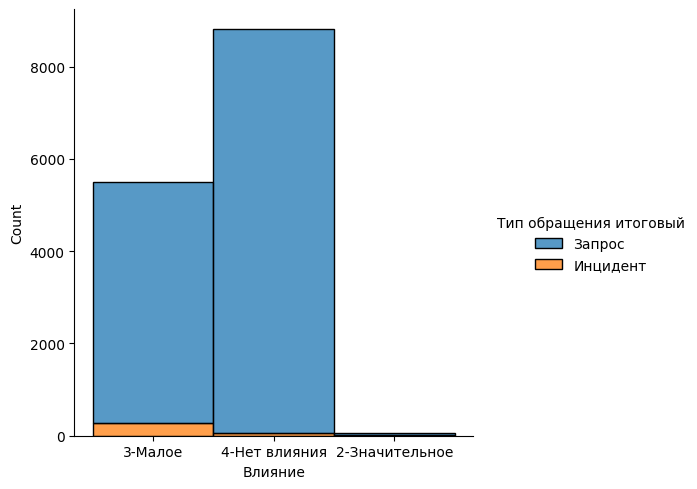

In [62]:
sns.displot(df, x="Влияние",hue="Тип обращения итоговый", multiple="stack")

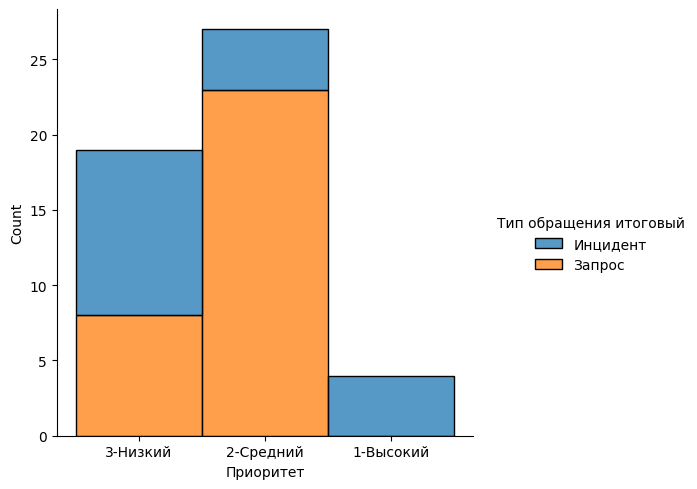

In [83]:
sns.displot(df[df['Влияние']=="2-Значительное" ], x="Приоритет",hue="Тип обращения итоговый", multiple="stack")

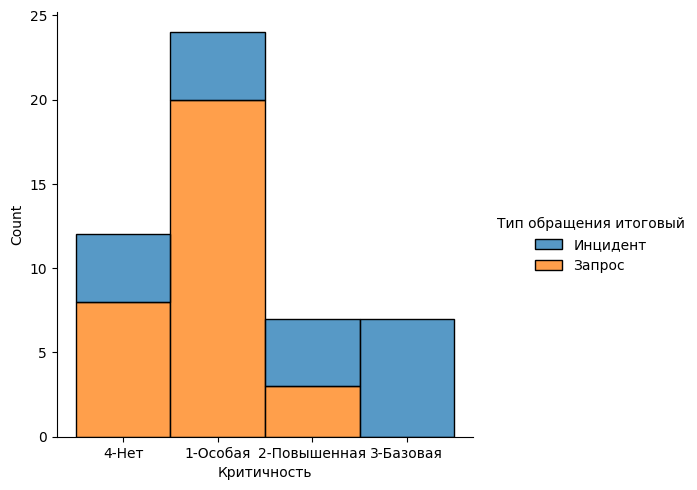

In [84]:
sns.displot(df[df['Влияние']=="2-Значительное" ], x="Критичность",hue="Тип обращения итоговый", multiple="stack")

In [97]:
df['koef'] = (df['Приоритет'] + df['Критичность'])/df['Влияние']
df

C:\Users\SlRoc\AppData\Local\Temp\ipykernel_10932\3361245624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['koef'] = (df['Приоритет'] + df['Критичность'])/df['Влияние']


,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,koef
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2,1,ФГ8,2018-01-31 07:51,2018-01-25 22:47,0,0,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1,3,Система7,Место190,1.000000
3,.Не включается ПК,АРМ,3,1,ФГ390,2018-01-28 05:50,2018-01-25 23:13,1,1,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4,3,База,Место177,2.333333
4,"Заявка № ***********, *******************",АРМ,3,1,ФГ303,2018-02-03 02:51,2018-01-25 23:39,0,0,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4,4,База,Место216,1.750000
5,"Заявка № ***********, *******************",АРМ,3,1,ФГ372,2018-01-31 07:51,2018-01-25 23:39,0,0,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,4,4,Система62,Место216,1.750000
6,"Заявка № ***********, *******************",АРМ,3,1,ФГ303,2018-02-01 02:51,2018-01-25 23:39,0,0,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,4,4,База,Место216,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2,1,ФГ8,2018-02-21 14:17,2018-02-16 13:02,0,0,Личность пользователя идентифицирована\r\nПри...,0,2018-02-16 13:02,2018-02-23 14:18,1,3,Система7,Место50,1.000000
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3,1,ФГ135,2018-02-21 14:36,2018-02-16 13:07,0,0,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4,3,База,Место3,2.333333
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3,1,ФГ315,2018-02-21 14:23,2018-02-16 13:08,0,0,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4,4,Система2,Место163,1.750000
14801,Ремонт стульев.,Сервис73,3,1,ФГ159,2018-02-21 14:24,2018-02-16 13:09,0,0,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4,4,Система71,Место3,1.750000


In [166]:
df[df['Критичность'] == 3]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,range_time,koef,numeric_sod,numeric_ans
34,"Заявка № ***********, *******************",Сервис154,0,1,14,2018-01-31 07:51,2018-01-26 02:36:00,0,0,Заявка выполнена,...,2018-01-27 03:55,2018-02-03 07:52:00,3,0,97,9,197.266667,0,458,779
54,Заявка на предоставление и отзыв прав доступа ...,Сервис22,0,1,20,2018-02-02 16:36,2018-01-26 03:33:00,0,0,"выполнено переименование УЗ инициатора, оказан...",...,2018-02-01 04:06,2018-02-08 07:55:00,3,0,101,18,316.366667,0,374,1443
61,Настройка ЭП в Сервис22,Сервис22,0,1,24,2018-01-31 07:51,2018-01-26 03:51:00,0,0,Права предоставлены.,...,2018-01-26 13:16,2018-01-26 17:03:00,3,0,22,21,13.200000,0,510,1094
62,Настройка ЭП в Сервис22,Сервис22,0,1,24,2018-01-31 07:51,2018-01-26 03:53:00,0,0,Выполнено.,...,2018-01-26 07:14,2018-01-26 07:26:00,3,0,22,22,3.550000,0,510,365
95,Заявка на предоставление и отзыв прав доступа ...,Сервис22,0,1,8,2018-01-31 07:51,2018-01-26 05:05:00,0,0,Работы по обращению выполнены,...,2018-01-26 08:39,2018-02-02 09:56:00,3,0,101,1,172.850000,0,374,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14771,Заявка на предоставление и отзыв прав доступа ...,Сервис22,0,1,8,2018-02-18 12:36,2018-02-16 12:36:00,0,0,Работы по обращению выполнены,...,2018-02-16 12:59,2018-02-23 14:18:00,3,0,101,125,169.700000,0,374,1167
14772,Заявка на предоставление и отзыв прав доступа ...,Сервис22,0,1,8,2018-02-21 07:51,2018-02-16 12:37:00,0,0,Работы по обращению выполнены,...,2018-02-18 06:38,2018-02-25 07:56:00,3,0,101,20,211.316667,0,374,1167
14779,.Стационарный телефон (плохая связь),Сервис93,0,1,522,2018-02-17 11:40,2018-02-16 12:40:00,1,1,Замена Т/А,...,2018-02-16 15:05,2018-02-16 15:15:00,3,1,92,66,2.583333,3,171,710
14796,Заявка на предоставление и отзыв прав доступа ...,Сервис22,0,1,8,2018-03-17 06:36,2018-02-16 12:59:00,0,0,Работы по обращению выполнены,...,2018-03-16 02:16,2018-03-23 07:56:00,3,0,101,231,834.950000,0,374,1167


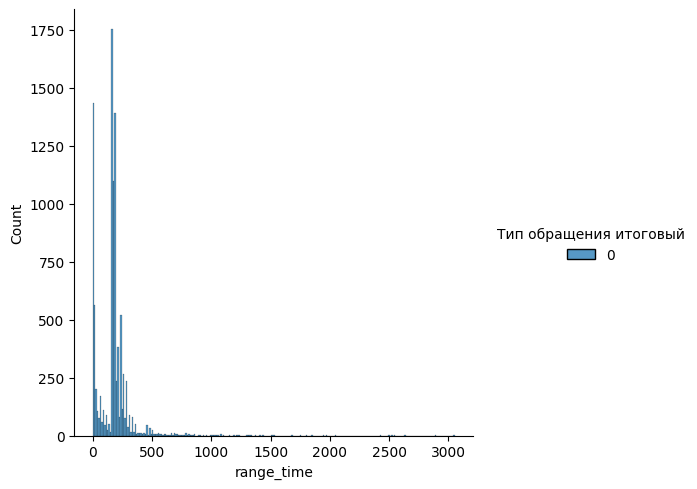

In [184]:
sns.displot(df[df['Тип обращения итоговый']==0], x="range_time",hue="Тип обращения итоговый", multiple="stack")